In [103]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [104]:
def num2log(arr):
    return np.log(arr+1)

In [105]:
df = pd.read_csv('train.csv',header='infer',verbose=True)

Tokenization took: 2.99 ms
Type conversion took: 4.99 ms
Parser memory cleanup took: 0.00 ms


In [106]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [107]:
df['Alley'].isna().sum()

1369

In [108]:
df['Alley'].notnull()

0       False
1       False
2       False
3       False
4       False
        ...  
1455    False
1456    False
1457    False
1458    False
1459    False
Name: Alley, Length: 1460, dtype: bool

In [109]:
df.loc[df['Alley'].notna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
21,22,45,RM,57.0,7449,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,GdPrv,NaN,0,6,2007,WD,Normal,139400
30,31,70,C (all),50.0,8500,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,7,2008,WD,Normal,40000
56,57,160,FV,24.0,2645,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2009,WD,Abnorml,172500
79,80,50,RM,60.0,10440,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,110000
87,88,160,FV,40.0,3951,Pave,Pave,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2009,New,Partial,164500
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1404,1405,50,RL,60.0,10410,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,1,2006,WD,Family,105000
1414,1415,50,RL,64.0,13053,Pave,Pave,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,207000
1427,1428,50,RL,60.0,10930,Pave,Grvl,Reg,Bnk,AllPub,...,0,NaN,NaN,NaN,0,4,2008,WD,Normal,140000
1432,1433,30,RL,60.0,10800,Pave,Grvl,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,64500


plotting all the distribution of the MSSubClass, LotFrontage, LotArea, and price values 

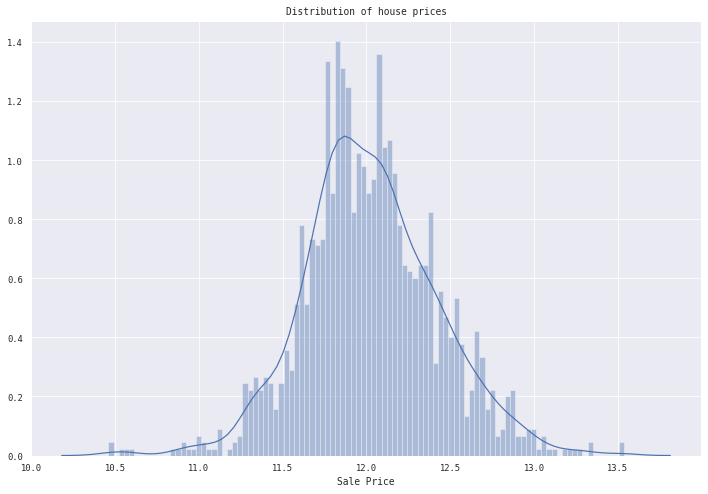

In [110]:
plt.figure(figsize=(12,8))
sns.distplot(num2log(df.SalePrice.values), bins=100, kde=True)
plt.xlabel('Sale Price')
plt.title('Distribution of house prices')
plt.show()

Distribution is fine

In [111]:
df['log_Sale_Price']  = num2log(df.SalePrice.values)

plotting the distribution of the month-year and the sale prices

first finding the earliest year in the df



In [112]:
earliest_year = df['YrSold'].min()
earliest_year

2006

In [113]:
latest_year = df['YrSold'].max()
latest_year

2010

grouping by the sample by the month sold

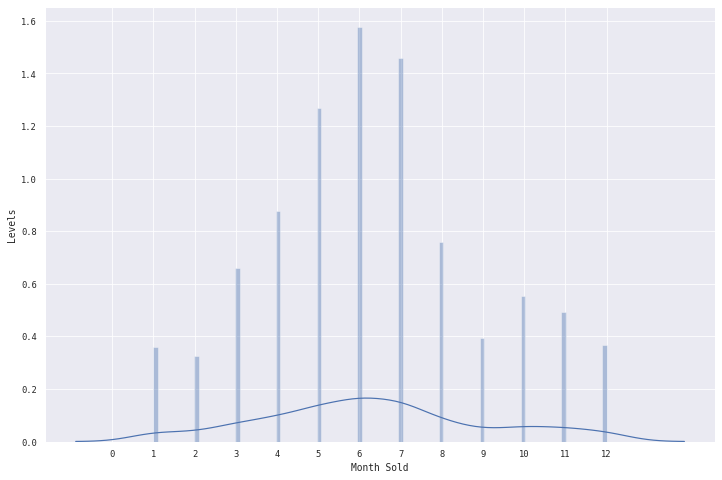

In [114]:
plt.figure(figsize=(12,8))
sns.distplot(df['MoSold'], bins=100, kde=True)
plt.xlabel('Month Sold')
plt.ylabel('Levels')
plt.xticks(np.arange(0, 13, step=1))
# plt.yticks(np.arange(0, , step=1))
plt.show()

In [115]:
month_count = df.groupby('MoSold').count().reset_index()

In [116]:
year_month_sales = df.groupby('YrSold')['MoSold'].value_counts().sort_values()

In [117]:
year_month_sales

YrSold  MoSold
2010    7          6
2007    2          8
2006    2          9
2008    2         10
2009    2         10
2006    1         10
2010    1         10
2007    9         11
2009    1         12
2006    12        12
2008    1         13
2007    1         13
2008    12        14
2006    9         15
2010    2         15
2009    12        15
2007    10        16
2006    11        16
2008    9         17
        11        17
2007    12        18
2008    3         18
2009    3         19
        9         20
2010    3         21
2009    11        22
2008    10        22
2007    4         23
        3         23
2006    8         23
2007    11        24
2006    10        24
        3         25
2008    4         26
2009    4         26
2006    4         27
2009    10        27
2008    8         29
2009    8         30
2010    6         36
2009    5         37
2008    5         38
2006    5         38
2010    4         39
2007    8         40
        5         43
2006    6         4

In [118]:
year_month_sales = pd.DataFrame(year_month_sales)

In [119]:
year_month_sales

,,MoSold
YrSold,MoSold,
2010,7,6
2007,2,8
2006,2,9
2008,2,10
2009,2,10
2006,1,10
2010,1,10
2007,9,11
2009,1,12


array([<matplotlib.axes._subplots.AxesSubplot object at 0x0000021FE9466548>,
      dtype=object)

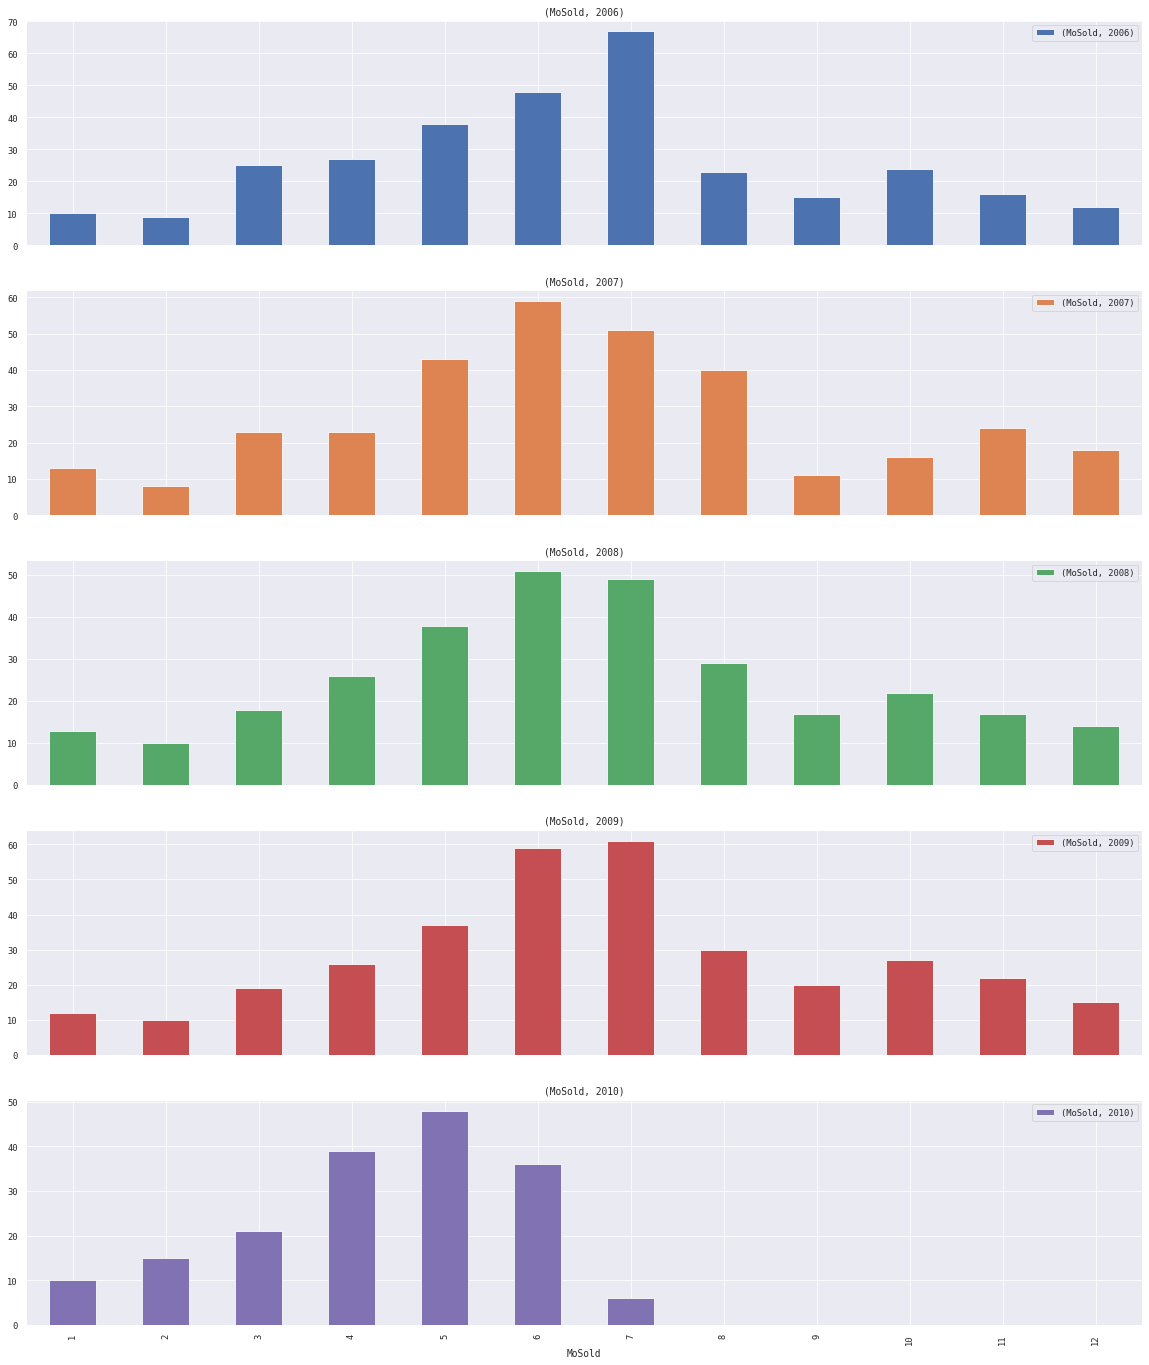

In [120]:

year_month_sales.unstack(level=0).plot(kind='bar', subplots=True, figsize=(20,24))

From the above subplots, it can bee deemed that the number of sales across the years peakes around june and july except for 2010 where the maximum sales are during may and june and data is missing w.r.t to 2010 post july.

And from the previous distplot maximum number of sale across the years is June.

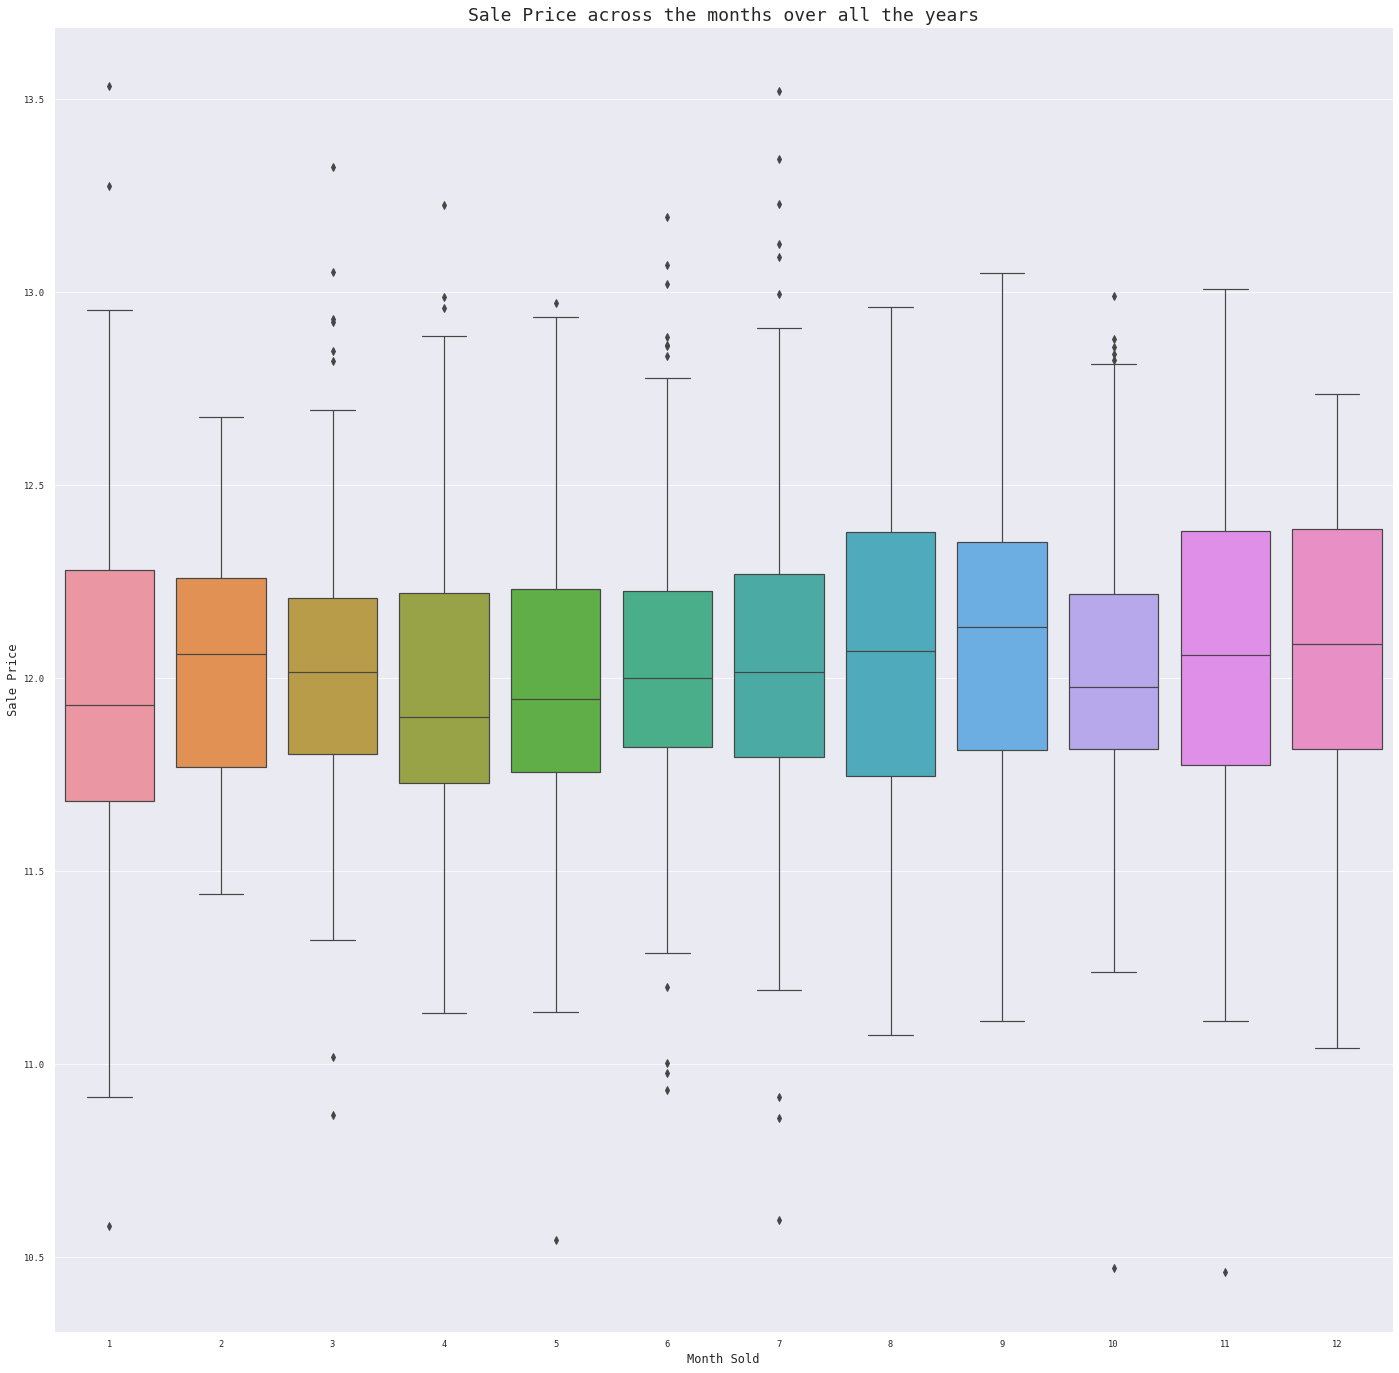

In [121]:
plt.figure(figsize=(24,24))
sns.boxplot(x=df['MoSold'], y=num2log(df['SalePrice'].values), data=df)
plt.xlabel('Month Sold', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.title('Sale Price across the months over all the years', fontsize=18)
plt.show()


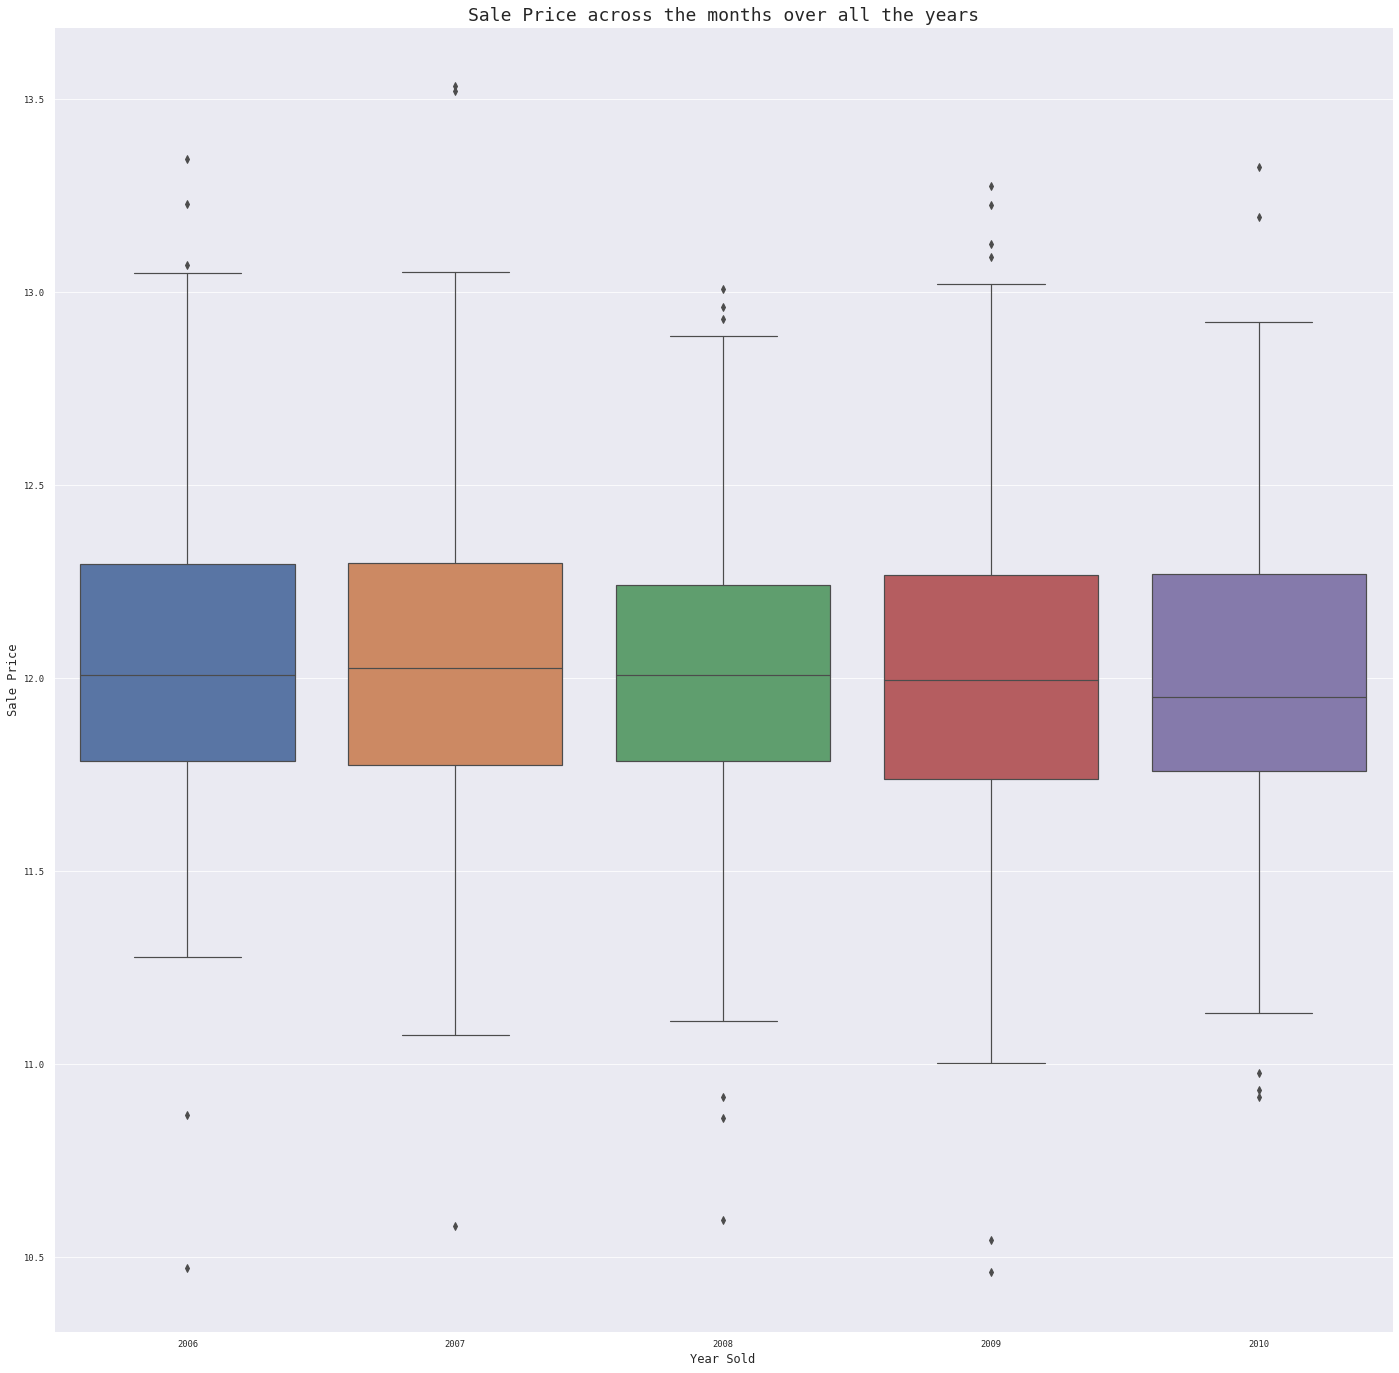

In [122]:
plt.figure(figsize=(24,24))
sns.boxplot(x=df['YrSold'], y=num2log(df['SalePrice'].values), data=df)
plt.xlabel('Year Sold', fontsize=12)
plt.ylabel('Sale Price', fontsize=12)
plt.title('Sale Price across the months over all the years', fontsize=18)
plt.show()

As we can see from the above graph that the sale price does not vary a lot over the years, hence i believe that most predictions using the year as a feature would not be very helpful 

On the other hand the sale price vs monthly sold would be a feature worth selecting to predict the housing prices

Now plotting the MSSubClass against the sale price 

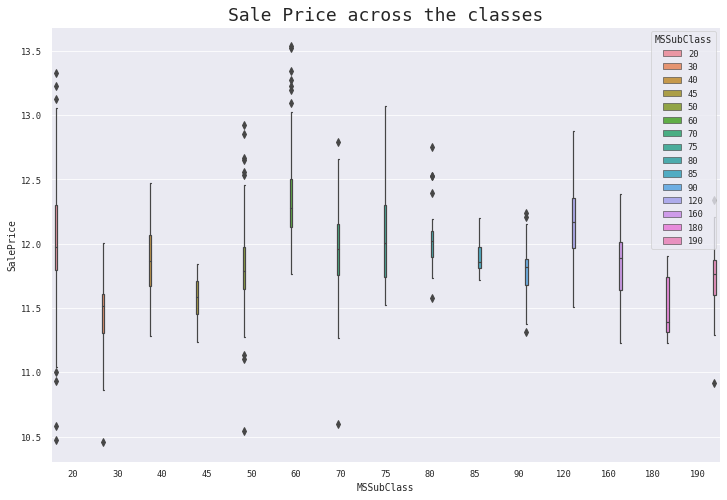

In [123]:
plt.figure(figsize=(12,8))
sns.boxplot(x='MSSubClass', y=num2log(df['SalePrice']), hue=df['MSSubClass'], data=df)
plt.xlabel('MSSubClass')
plt.ylabel('SalePrice')
plt.title('Sale Price across the classes', fontsize=18)
plt.show()

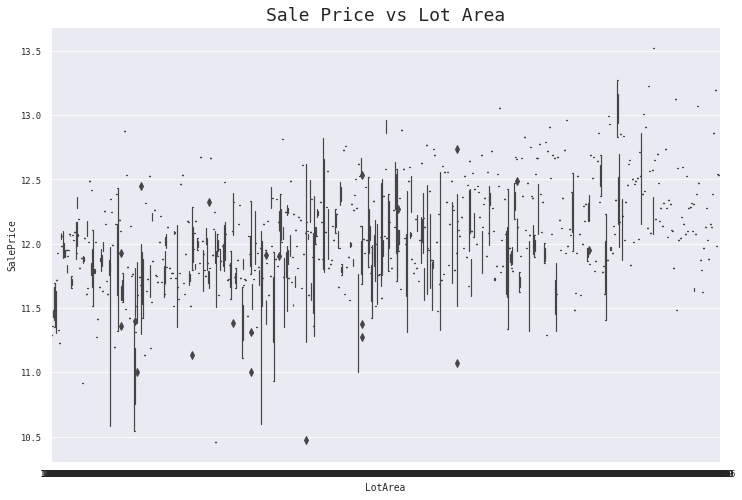

In [124]:
plt.figure(figsize=(12,8))
sns.boxplot(x='LotArea', y=num2log(df['SalePrice']), data=df)
plt.xlabel('LotArea')
plt.ylabel('SalePrice')
plt.title('Sale Price vs Lot Area', fontsize=18)
plt.show()

well, there seems that there could be some correlation

In [125]:
missing_counts = df.isnull().sum().reset_index()

In [126]:
missing_counts

,index,0
0,Id,0
1,MSSubClass,0
2,MSZoning,0
3,LotFrontage,259
4,LotArea,0
...,...,...
77,YrSold,0
78,SaleType,0
79,SaleCondition,0
80,SalePrice,0


In [127]:
missing_counts.columns = ['Features', 'count']

In [128]:
missing_counts = missing_counts.sort_values(by='count', ascending='False').loc[missing_counts['count']>0]

In [129]:
missing_counts['percentage'] = missing_counts['count']/float(df.shape[0]) * 100

In [130]:
ind = np.arange(missing_counts.shape[0])


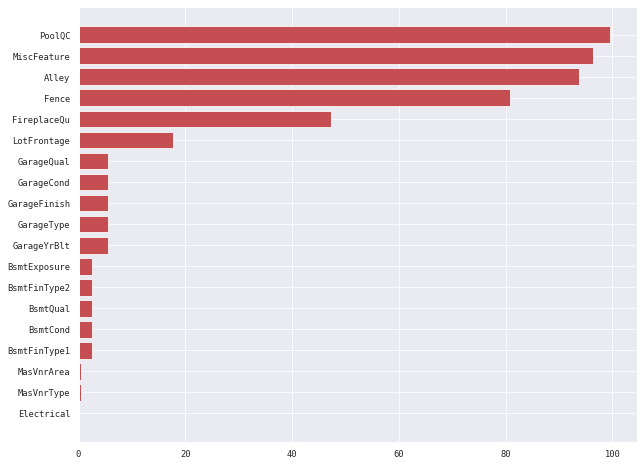

In [131]:
fig, ax = plt.subplots(figsize=(10,8))
ax.barh(ind, missing_counts['percentage'], color='r')
ax.set_yticks(ind)
ax.set_yticklabels(missing_counts.Features, rotation='horizontal')
plt.show()

In [132]:
delete_col = missing_counts.loc[missing_counts['percentage']>50].Features.values

In [133]:
delete_col

array(['Fence', 'Alley', 'MiscFeature', 'PoolQC'], dtype=object)

In [134]:
df = df.drop(delete_col, axis=1)

In [135]:
# def clean_dataset(df):
#     assert isinstance(df, pd.DataFrame), "df needs to be a pd.DataFrame"
#     df.dropna(inplace=True)
#     indices_to_keep = ~df.isin([np.nan, np.inf, -np.inf]).any(1)
#     return df[indices_to_keep].astype(np.float64)

# df = clean_dataset(df)

Feature selection by correlation

In [136]:
from sklearn.preprocessing import LabelEncoder

In [137]:
for f in df.columns:
    if df[f].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(df[f].values))
        df[f] = lbl.transform(list(df[f]))
            

In [138]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 78 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              1460 non-null   int64  
 1   MSSubClass      1460 non-null   int64  
 2   MSZoning        1460 non-null   int64  
 3   LotFrontage     1201 non-null   float64
 4   LotArea         1460 non-null   int64  
 5   Street          1460 non-null   int64  
 6   LotShape        1460 non-null   int64  
 7   LandContour     1460 non-null   int64  
 8   Utilities       1460 non-null   int64  
 9   LotConfig       1460 non-null   int64  
 10  LandSlope       1460 non-null   int64  
 11  Neighborhood    1460 non-null   int64  
 12  Condition1      1460 non-null   int64  
 13  Condition2      1460 non-null   int64  
 14  BldgType        1460 non-null   int64  
 15  HouseStyle      1460 non-null   int64  
 16  OverallQual     1460 non-null   int64  
 17  OverallCond     1460 non-null   i

In [139]:
df['logSalePrice'] = df['SalePrice'].transform(num2log)

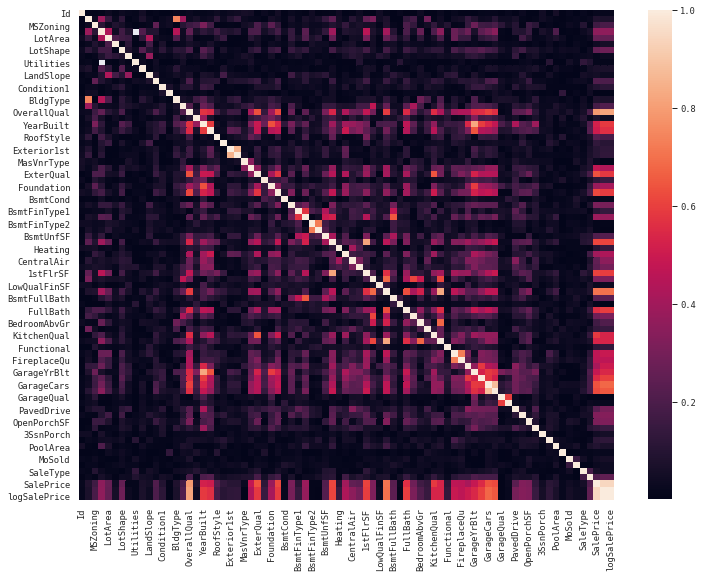

In [140]:
corrmat = df.corr(method='pearson', min_periods=1000)

corrmat = np.abs(corrmat)

sns.set(context='paper', font='monospace')
f, ax = plt.subplots(figsize=(12,9))
sns.heatmap(corrmat, xticklabels='auto', yticklabels='auto')
plt.show()

Too many correlations, unclear how to reduce the number of dimentions.

Finding the correlation between the target and the logSalePrice

In [141]:
corr_target = corrmat['logSalePrice'].reset_index()[:-2]

Sorting the values of the logSalePrice in ascending order, and then selecting the first 50 features where the logSalePrice correlation is greater than 0.01

In [142]:
corr_target = corr_target.sort_values(by='logSalePrice', ascending=True)[:50].loc[corr_target['logSalePrice']>0.01]


In [143]:
corr_target

,index,logSalePrice
34,BsmtFinType2,0.011503
8,Utilities,0.012632
0,Id,0.017942
71,MiscVal,0.020021
63,GarageCond,0.020578
30,BsmtCond,0.022233
7,LandContour,0.032340
74,SaleType,0.036747
17,OverallCond,0.036868
73,YrSold,0.037263


plotting the features and the logSalePrice

In [144]:
corr_target.columns

Index(['index', 'logSalePrice'], dtype='object')

In [145]:
ind = np.arange(corr_target.shape[0])

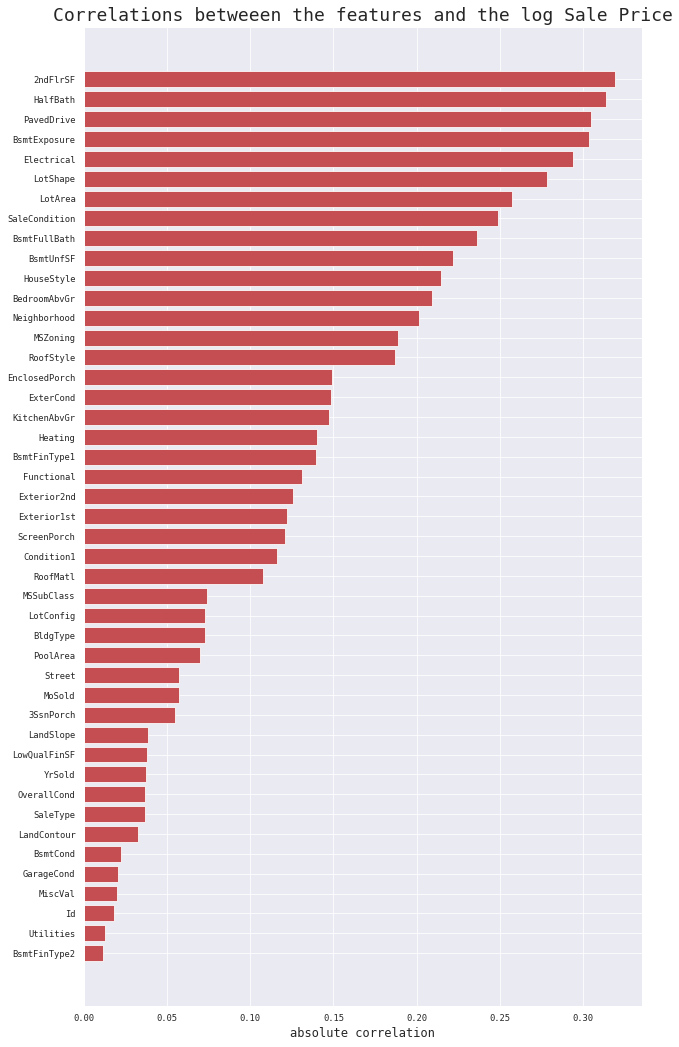

In [146]:
fig, ax = plt.subplots(figsize=(10,18))
rects = ax.barh(ind, corr_target.logSalePrice.values, color='r')
ax.set_yticks(ind)
ax.set_yticklabels(corr_target['index'].values, rotation='horizontal')
ax.set_xlabel('absolute correlation', fontsize=12)
ax.set_title("Correlations betweeen the features and the log Sale Price", fontsize=18)
plt.show()


In [147]:
corr_target_features = list(corr_target['index'].values)

now checking for the correlation between features

In [148]:
corr_target_features2 = corr_target_features
corr_target_features2.append('logSalePrice')

In [149]:
high_correlation_features = df[corr_target_features2].corr(method='pearson', min_periods=100)

In [150]:
high_correlation_features

,BsmtFinType2,Utilities,Id,MiscVal,GarageCond,BsmtCond,LandContour,SaleType,OverallCond,YrSold,...,BsmtFullBath,SaleCondition,LotArea,LotShape,Electrical,BsmtExposure,PavedDrive,HalfBath,2ndFlrSF,logSalePrice
BsmtFinType2,1.000000,-0.020520,0.042717,-0.002721,0.022073,0.090544,-0.029588,-0.011938,-0.106760,-0.024237,...,-0.162743,0.031894,-0.070658,0.037664,-0.038927,0.106811,-0.089261,0.030729,0.059210,-0.011503
Utilities,-0.020520,1.000000,0.013324,-0.002296,0.001804,0.006098,0.008238,-0.126770,0.009994,0.023353,...,-0.021467,-0.089701,0.010123,-0.036101,-0.091698,0.015496,0.007586,-0.019939,-0.020818,-0.012632
Id,0.042717,0.013324,1.000000,-0.006242,-0.021620,0.005476,-0.019659,0.019773,0.012609,0.000712,...,0.002289,-0.005806,-0.033226,0.032122,0.038617,-0.024332,0.005971,0.006784,0.005590,-0.017942
MiscVal,-0.002721,-0.002296,-0.006242,1.000000,0.006042,0.013973,0.020912,0.015773,0.068777,0.004906,...,-0.023047,0.013027,0.038068,-0.042061,0.023011,0.018230,-0.044721,0.001290,0.016197,-0.020021
GarageCond,0.022073,0.001804,-0.021620,0.006042,1.000000,0.114426,-0.023389,-0.002149,-0.032822,0.028678,...,0.040184,-0.034137,-0.004697,-0.031131,0.057392,-0.028334,0.036041,0.018813,-0.037496,0.020578
BsmtCond,0.090544,0.006098,0.005476,0.013973,0.114426,1.000000,0.022622,0.033285,-0.018820,0.081336,...,0.005523,0.016773,0.007312,0.006303,0.076151,0.030735,0.089599,0.024299,-0.063702,0.022233
LandContour,-0.029588,0.008238,-0.019659,0.020912,-0.023389,0.022622,1.000000,-0.025754,-0.045271,0.020507,...,0.009773,0.033809,-0.149083,0.085434,0.082813,0.043903,0.140921,0.029727,-0.034245,0.032340
SaleType,-0.011938,-0.126770,0.019773,0.015773,-0.002149,0.033285,-0.025754,1.000000,0.095267,-0.002327,...,0.029290,0.184067,0.012292,-0.000911,0.009457,0.000229,-0.039365,0.031810,0.053345,-0.036747
OverallCond,-0.106760,0.009994,0.012609,0.068777,-0.032822,-0.018820,-0.045271,0.095267,1.000000,0.043950,...,-0.054942,0.017758,-0.005636,0.013693,0.062295,0.062017,-0.062236,-0.060769,0.028942,-0.036868
YrSold,-0.024237,0.023353,0.000712,0.004906,0.028678,0.081336,0.020507,-0.002327,0.043950,1.000000,...,0.067049,0.003880,-0.014261,0.036449,0.034686,0.059532,0.006556,-0.010269,-0.028700,-0.037263


since there are plenty of negative correlations, we prefer having the values as positive, hence we'll take the absolute values of the correlation times a 100

In [151]:
high_correlation_features = np.abs(high_correlation_features)*100

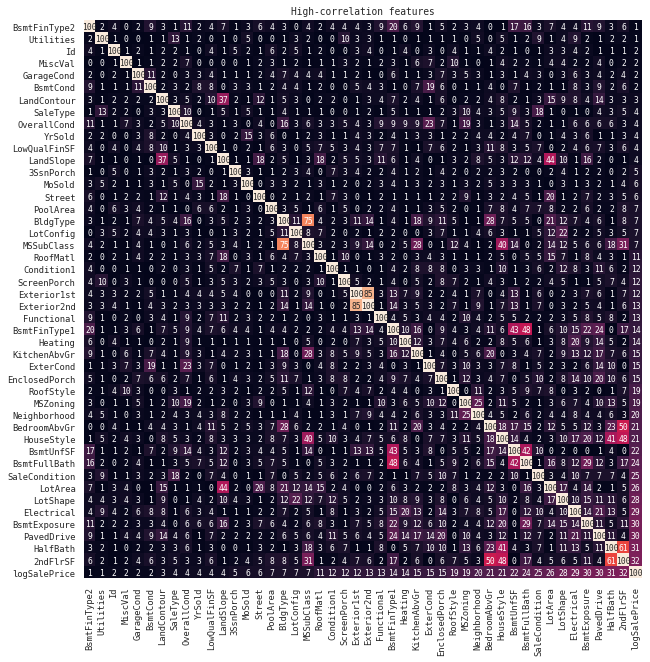

In [152]:
f, ax = plt.subplots(figsize=(10,18))
sns.heatmap(high_correlation_features, annot=True, cbar=False, square=True, fmt='0.0f', annot_kws={'size':8})
plt.title('High-correlation features')
plt.show()

In [153]:
import xgboost as xgb

Feature selection by xgboost m

In [154]:
df.dropna(inplace=True)

In [155]:
train_y = df.SalePrice.values
train_X = df.drop(['logSalePrice','log_Sale_Price','Id', 'SalePrice'], axis=1)

In [156]:
xgb_params = {'eta': 0.5, 
              'max_depth':  10,
             'subsample': 1,
             'colsample_bytree': 0.7,
             'objective': 'reg:linear',
             'eval_metric': 'rmse',
             'silent': 1}

dtrain = xgb.DMatrix(train_X, train_y, feature_names = train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100)


[14:28:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[14:28:21] WARNING: C:\Users\Administrator\workspace\xgboost-win64_release_1.1.0\src\learner.cc:480: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[14:28:21] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


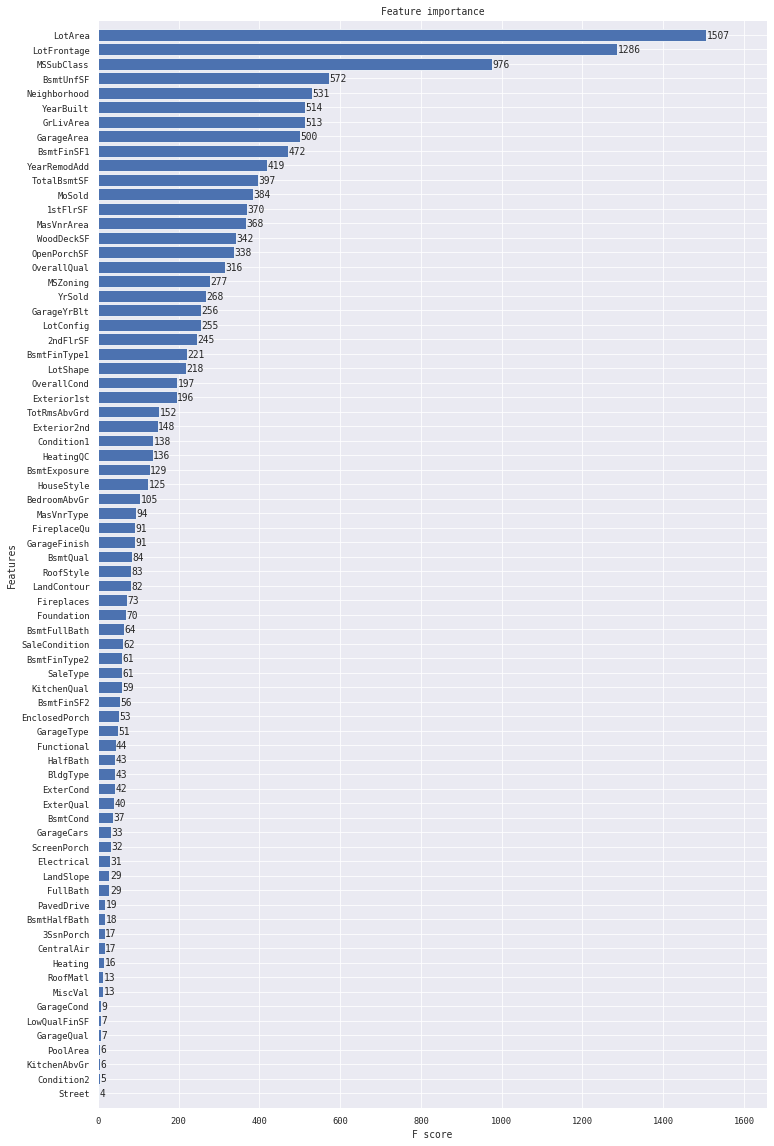

In [157]:
remain = 100
fig, ax = plt.subplots(figsize=(12,20))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

In [158]:
importance = model.get_score(importance_type='weight')
importance

{'OverallQual': 316,
 '1stFlrSF': 370,
 'MSZoning': 277,
 'GarageArea': 500,
 'OverallCond': 197,
 'FullBath': 29,
 '2ndFlrSF': 245,
 'GarageType': 51,
 'Foundation': 70,
 'LandContour': 82,
 'TotRmsAbvGrd': 152,
 'GrLivArea': 513,
 'TotalBsmtSF': 397,
 'YearBuilt': 514,
 'LotFrontage': 1286,
 'BsmtFinSF1': 472,
 'BedroomAbvGr': 105,
 'BsmtUnfSF': 572,
 'EnclosedPorch': 53,
 'YearRemodAdd': 419,
 'GarageYrBlt': 256,
 'GarageQual': 7,
 'LotShape': 218,
 'BsmtHalfBath': 18,
 'Fireplaces': 73,
 'PavedDrive': 19,
 'Condition2': 5,
 'Functional': 44,
 'KitchenAbvGr': 6,
 'GarageFinish': 91,
 'Neighborhood': 531,
 'BldgType': 43,
 'GarageCars': 33,
 'LotArea': 1507,
 'SaleType': 61,
 'HouseStyle': 125,
 'Condition1': 138,
 'HalfBath': 43,
 'MoSold': 384,
 'BsmtQual': 84,
 'SaleCondition': 62,
 'LandSlope': 29,
 'MasVnrArea': 368,
 'Exterior1st': 196,
 'MasVnrType': 94,
 'BsmtExposure': 129,
 'OpenPorchSF': 338,
 'BsmtFullBath': 64,
 'WoodDeckSF': 342,
 'MSSubClass': 976,
 'MiscVal': 13,
 'Bs

In [159]:
tuples = sorted([(k, importance[k]) for k in importance], key=lambda x: x[1], reverse=True) 

In [160]:
tuples

[('LotArea', 1507),
 ('LotFrontage', 1286),
 ('MSSubClass', 976),
 ('BsmtUnfSF', 572),
 ('Neighborhood', 531),
 ('YearBuilt', 514),
 ('GrLivArea', 513),
 ('GarageArea', 500),
 ('BsmtFinSF1', 472),
 ('YearRemodAdd', 419),
 ('TotalBsmtSF', 397),
 ('MoSold', 384),
 ('1stFlrSF', 370),
 ('MasVnrArea', 368),
 ('WoodDeckSF', 342),
 ('OpenPorchSF', 338),
 ('OverallQual', 316),
 ('MSZoning', 277),
 ('YrSold', 268),
 ('GarageYrBlt', 256),
 ('LotConfig', 255),
 ('2ndFlrSF', 245),
 ('BsmtFinType1', 221),
 ('LotShape', 218),
 ('OverallCond', 197),
 ('Exterior1st', 196),
 ('TotRmsAbvGrd', 152),
 ('Exterior2nd', 148),
 ('Condition1', 138),
 ('HeatingQC', 136),
 ('BsmtExposure', 129),
 ('HouseStyle', 125),
 ('BedroomAbvGr', 105),
 ('MasVnrType', 94),
 ('GarageFinish', 91),
 ('FireplaceQu', 91),
 ('BsmtQual', 84),
 ('RoofStyle', 83),
 ('LandContour', 82),
 ('Fireplaces', 73),
 ('Foundation', 70),
 ('BsmtFullBath', 64),
 ('SaleCondition', 62),
 ('SaleType', 61),
 ('BsmtFinType2', 61),
 ('KitchenQual', 5

In [161]:
xgb_imp_f = [x[0] for x in tuples]

Summary of all of the above exercises

In [162]:
total_f = list(set(xgb_imp_f)|set(corr_target_features))
common_f = list(set(xgb_imp_f) & set(corr_target_features))

In [163]:
xgb_top_f = xgb_imp_f[:12]
corr_top_f = corr_target_features[:12]
print('there are {} features choses in total'.format(len(total_f)))
print('there are {} features choses in common'.format(len(common_f)))

there are 77 features choses in total
there are 43 features choses in common


now, let's get into the meat of the problem 1) impute the missing values 2) normalize

using the total_f from the above summary as features to train the model on 

In [164]:
train_cols = total_f

In [165]:
test_cols = total_f
test_cols.remove('logSalePrice')

In [166]:
# if 'logSalePrice' not in train_cols:
#     train_cols.append('logSalePrice')

In [167]:
from sklearn.impute import SimpleImputer

In [168]:
df = df.reset_index()

In [169]:
df.head()

,index,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,log_Sale_Price,logSalePrice
0,0,1,60,3,65.0,8450,1,3,3,0,...,0,0,0,2,2008,8,4,208500,12.247699,12.247699
1,1,2,20,3,80.0,9600,1,3,3,0,...,0,0,0,5,2007,8,4,181500,12.109016,12.109016
2,2,3,60,3,68.0,11250,1,0,3,0,...,0,0,0,9,2008,8,4,223500,12.317171,12.317171
3,3,4,70,3,60.0,9550,1,0,3,0,...,0,0,0,2,2006,8,0,140000,11.849405,11.849405
4,4,5,60,3,84.0,14260,1,0,3,0,...,0,0,0,12,2008,8,4,250000,12.429220,12.429220


In [170]:
missing_imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent', verbose=0, copy=True)

missing_imputer.fit(df[test_cols])

train_df = pd.DataFrame(missing_imputer.transform(df[test_cols]), columns=test_cols)

In [171]:
from sklearn.preprocessing import normalize


In [172]:
train_df = pd.DataFrame(normalize(train_df, norm='l2'), columns=test_cols)

In [173]:
train_df.columns

Index(['Heating', '1stFlrSF', 'Utilities', 'YrSold', 'GarageFinish', 'Id',
       'MoSold', 'CentralAir', 'MiscVal', 'GarageArea', 'HeatingQC',
       'BsmtFinSF2', 'GarageType', 'HouseStyle', 'BldgType', 'PavedDrive',
       'Condition2', 'YearRemodAdd', 'MasVnrArea', 'Condition1',
       'LowQualFinSF', 'GarageCars', 'LandContour', 'OverallQual',
       'BsmtHalfBath', 'GarageQual', 'PoolArea', 'Electrical', 'GarageCond',
       'BsmtCond', 'HalfBath', 'GrLivArea', 'BsmtExposure', 'FullBath',
       'LotShape', 'BsmtQual', 'YearBuilt', 'RoofStyle', 'LandSlope', 'Street',
       'TotRmsAbvGrd', 'Fireplaces', 'LotArea', 'EnclosedPorch', 'RoofMatl',
       '2ndFlrSF', 'OpenPorchSF', 'OverallCond', 'TotalBsmtSF', 'KitchenAbvGr',
       'LotConfig', 'MasVnrType', 'ExterCond', 'LotFrontage', 'GarageYrBlt',
       'ExterQual', 'Foundation', 'BsmtFinType1', 'BsmtUnfSF', 'Functional',
       'SaleType', 'MSZoning', 'Exterior2nd', 'WoodDeckSF', 'BsmtFinType2',
       'BsmtFullBath', 'BedroomAb

In [174]:
model = xgb.XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=4,
             min_child_weight=0.0, monotone_constraints='()',
             n_estimators=1250, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [175]:
from sklearn.model_selection import train_test_split

In [176]:
train_df.shape

(1121, 76)

In [177]:
train_y.shape

(1121,)

In [178]:
train_X, test_X, train_Y, test_Y = train_test_split(train_df, train_y, random_state=1)

In [179]:
model.fit(train_X, train_Y)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=4,
             min_child_weight=0.0, missing=nan, monotone_constraints='()',
             n_estimators=1250, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [180]:
preds = model.predict(test_X)

In [219]:
model.get_params

<bound method XGBModel.get_params of XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.6, gamma=0.0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.02, max_delta_step=0, max_depth=4,
             min_child_weight=0.0, missing=nan, monotone_constraints='()',
             n_estimators=1250, n_jobs=0, num_parallel_tree=1, random_state=42,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=0.8,
             tree_method='exact', validate_parameters=1, verbosity=None)>

In [225]:
from xgboost import plot_importance

In [222]:
import graphviz

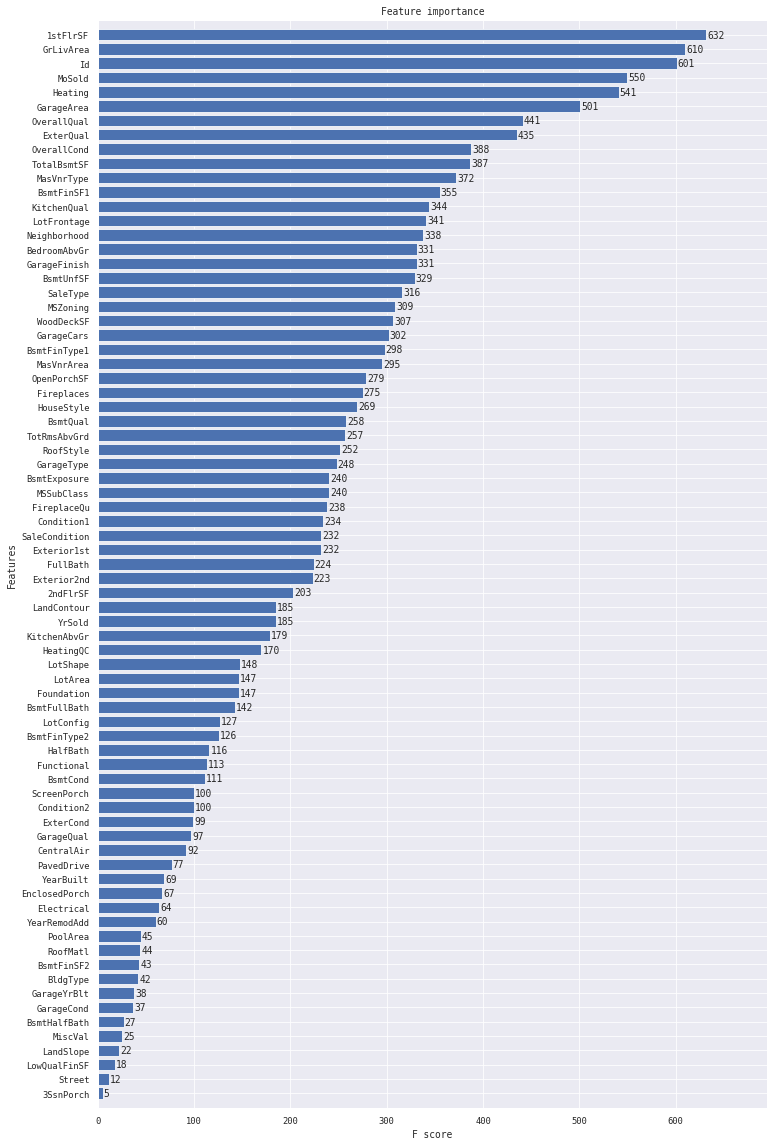

In [238]:
remain = 100
fig, ax = plt.subplots(figsize=(12,20))
xgb.plot_importance(model, height=0.8, ax=ax)
plt.show()

In [181]:
from sklearn.metrics import r2_score

In [182]:
preds.shape

(281,)

In [183]:
y_test =  test_Y.astype('float32')

In [184]:
r2_score(y_test, preds)

0.8177683521661893

In [185]:
preds

array([118644.055, 396055.6  , 271173.   , 151689.72 , 216623.7  ,
       202596.42 , 141385.22 , 118505.766, 195605.11 , 226403.42 ,
       263198.9  , 147201.48 , 168620.47 , 344232.   , 152776.34 ,
       181354.6  , 193819.33 , 131794.53 , 191531.08 , 193911.38 ,
       178043.08 , 117601.85 , 174911.94 , 126838.484, 135979.55 ,
       186662.38 , 165853.22 , 169389.53 , 147654.78 , 185869.73 ,
       328562.3  , 289246.16 , 164803.33 , 136281.67 , 164323.2  ,
       111889.02 , 359992.88 , 151433.08 , 187759.31 , 317521.4  ,
       109231.11 , 323932.06 , 105768.62 , 197678.88 , 114696.24 ,
       139647.22 , 173649.28 , 173438.64 , 200259.6  , 259371.7  ,
       101944.484, 128482.75 , 260057.73 , 100788.6  , 161966.38 ,
       409659.8  , 192914.25 , 135493.88 , 159347.89 , 159551.84 ,
       123199.164, 135366.53 , 199601.66 , 111967.04 , 181427.2  ,
       122713.41 , 293083.5  , 117939.99 , 131974.94 , 135940.45 ,
       134113.8  , 130204.19 , 317110.34 , 264314.03 , 193312.

In [186]:
y_test

array([119000., 438780., 285000., 143900., 207000., 185000., 117000.,
       120500., 197000., 193500., 266000., 124000.,  90000., 354000.,
       144152., 150000., 180000., 130000., 242000., 208300., 159500.,
       118500., 170000., 132000., 131000., 205000., 172785., 200100.,
       145000., 181134., 326000., 265000., 165150., 132500., 129000.,
       102000., 402861., 108959., 194000., 348000., 102776., 280000.,
       127500., 178000., 118964.,  55993., 158000., 176000., 192000.,
       307000., 106500., 138500., 284000., 100000., 158000., 412500.,
       192000., 107000., 146000., 165000., 110000., 142500., 227000.,
       119000., 189000., 166000., 143000., 124500., 139000., 150750.,
       134000., 123000., 290000., 248900., 185900., 140000., 262500.,
       320000., 230500., 176000.,  94750., 392500., 240000., 205000.,
       134450., 158000., 165500., 202500., 144900., 164000.,  82500.,
       239000., 176500.,  91000., 149500., 140000.,  66500., 130000.,
       197000.,  850

In [204]:
test_df = pd.read_csv('test.csv', header='infer', verbose=True)

Tokenization took: 2.99 ms
Type conversion took: 24.63 ms
Parser memory cleanup took: 0.00 ms


In [205]:
for f in test_df.columns:
    if test_df[f].dtype == 'object':
        lbl = LabelEncoder()
        lbl.fit(list(test_df[f].values))
        test_df[f] = lbl.transform(list(test_df[f]))

In [206]:
test_df = test_df.drop(delete_col, axis=1)

In [190]:
# test_df.dropna(inplace=True)

In [207]:
test_df_Ids = test_df.Id.values

In [208]:
test_df = pd.DataFrame(missing_imputer.transform(test_df[test_cols]), columns=test_cols)

In [209]:
test_df = pd.DataFrame(normalize(test_df, norm='l2'), columns=test_cols)

In [210]:
test_df.columns

Index(['Heating', '1stFlrSF', 'Utilities', 'YrSold', 'GarageFinish', 'Id',
       'MoSold', 'CentralAir', 'MiscVal', 'GarageArea', 'HeatingQC',
       'BsmtFinSF2', 'GarageType', 'HouseStyle', 'BldgType', 'PavedDrive',
       'Condition2', 'YearRemodAdd', 'MasVnrArea', 'Condition1',
       'LowQualFinSF', 'GarageCars', 'LandContour', 'OverallQual',
       'BsmtHalfBath', 'GarageQual', 'PoolArea', 'Electrical', 'GarageCond',
       'BsmtCond', 'HalfBath', 'GrLivArea', 'BsmtExposure', 'FullBath',
       'LotShape', 'BsmtQual', 'YearBuilt', 'RoofStyle', 'LandSlope', 'Street',
       'TotRmsAbvGrd', 'Fireplaces', 'LotArea', 'EnclosedPorch', 'RoofMatl',
       '2ndFlrSF', 'OpenPorchSF', 'OverallCond', 'TotalBsmtSF', 'KitchenAbvGr',
       'LotConfig', 'MasVnrType', 'ExterCond', 'LotFrontage', 'GarageYrBlt',
       'ExterQual', 'Foundation', 'BsmtFinType1', 'BsmtUnfSF', 'Functional',
       'SaleType', 'MSZoning', 'Exterior2nd', 'WoodDeckSF', 'BsmtFinType2',
       'BsmtFullBath', 'BedroomAb

In [211]:
preds_test_df = model.predict(test_df)

In [212]:
preds_test_df

array([132265.23 , 166225.61 , 177087.9  , ..., 164154.83 , 127223.984,
       217835.81 ], dtype=float32)

In [213]:
test_df_Ids.shape

(1459,)

In [214]:
preds_test_df.shape

(1459,)

In [215]:
final = {'Id':test_df_Ids, 'SalePrice':preds_test_df}

In [216]:
final_df = pd.DataFrame(data=final)

In [217]:
final_df.head()

,Id,SalePrice
0,1461,132265.234375
1,1462,166225.609375
2,1463,177087.906250
3,1464,194411.625000
4,1465,201464.859375


In [202]:
final_df.ndim

2

In [203]:
final_df.to_csv('submission.csv', index=False)